In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [199]:
#!pip install threadpoolctl -U

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0


In [228]:
#os = os.environ['OMP_NUM_THREADS']='1'

In [2]:
data = {'height': [5,5.11,5.6,5.9,4.8,5.8,5.3,5.8,5.5,5.6],
        'age' : [45,26,30,34,40,36,19,28,23,32],
        'weight' : [77,47,55,59,72,60,40,60,45,58]}

print(data)

{'height': [5, 5.11, 5.6, 5.9, 4.8, 5.8, 5.3, 5.8, 5.5, 5.6], 'age': [45, 26, 30, 34, 40, 36, 19, 28, 23, 32], 'weight': [77, 47, 55, 59, 72, 60, 40, 60, 45, 58]}


In [3]:
df1 = pd.DataFrame(data)
df1

,height,age,weight
0,5.00,45,77
1,5.11,26,47
2,5.60,30,55
3,5.90,34,59
4,4.80,40,72
5,5.80,36,60
6,5.30,19,40
7,5.80,28,60
8,5.50,23,45
9,5.60,32,58


In [4]:
df1.shape

(10, 3)

In [5]:
df1.isnull().sum()

height    0
age       0
weight    0
dtype: int64

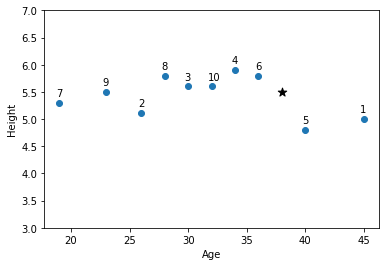

In [6]:
labels = df1.index + 1
plt.figure(figsize=(6,4))
plt.scatter(df1['age'], df1['height'])
plt.scatter(38,5.5, color='black', marker='*', s=80)
plt.xlabel('Age')
plt.ylabel('Height')
plt.ylim(3,7)
for i, x, y in zip(labels, df1['age'], df1['height']):
    plt.annotate(s=i, xy=(x-0.3, y+0.12))
plt.show()


# Eculidean Distance

In [7]:
np.float = float
np.str = str

In [8]:
df1['dist'] = np.sqrt((df1['height'] - 5.5)**2 + (df1['age'] - 38)**2)
df1

,height,age,weight,dist
0,5.00,45,77,7.017834
1,5.11,26,47,12.006336
2,5.60,30,55,8.000625
3,5.90,34,59,4.019950
4,4.80,40,72,2.118962
5,5.80,36,60,2.022375
6,5.30,19,40,19.001053
7,5.80,28,60,10.004499
8,5.50,23,45,15.000000
9,5.60,32,58,6.000833


# We can conclude that data points at index 5,4 and 3 are the k(3) nearest neighbors

In [9]:
df1.loc[[5,4,3], 'weight']

5    60
4    72
3    59
Name: weight, dtype: int64

Predicted Weight for Height = 5.5, age = 38

# KNN on Chemical process Dataset

In [10]:
df = pd.read_csv('E:\DATA Science\Machine Learning\ChemicalProcess.csv')
df.head(10)

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
5,43.57,6.12,58.36,65.31,15.17,21.79,51.23,100.0,18.30,12.13,...,0.018,0.4,2,7.2,0.0,0.00,11.5,2.2,1.8,2.0
6,43.12,7.48,64.47,72.41,13.82,17.71,54.45,100.0,18.72,12.95,...,0.019,0.8,2,7.3,0.0,0.00,11.7,0.7,2.0,2.2
7,43.06,6.94,63.60,72.06,15.70,19.42,54.72,100.0,18.85,13.13,...,0.019,1.0,2,7.3,0.0,0.00,11.4,0.8,2.0,2.2
8,41.49,6.94,63.60,72.06,15.70,19.42,54.72,100.0,18.85,13.13,...,0.019,1.2,3,7.4,0.0,0.00,11.4,0.9,1.9,2.1
9,42.45,6.94,63.60,72.06,15.70,19.42,54.72,100.0,18.85,13.13,...,0.019,1.8,3,7.1,0.0,0.00,11.3,0.8,1.9,2.4


In [11]:
df.shape

(176, 58)

In [12]:
df.columns

Index(['Yield', 'BiologicalMaterial01', 'BiologicalMaterial02',
       'BiologicalMaterial03', 'BiologicalMaterial04', 'BiologicalMaterial05',
       'BiologicalMaterial06', 'BiologicalMaterial07', 'BiologicalMaterial08',
       'BiologicalMaterial09', 'BiologicalMaterial10', 'BiologicalMaterial11',
       'BiologicalMaterial12', 'ManufacturingProcess01',
       'ManufacturingProcess02', 'ManufacturingProcess03',
       'ManufacturingProcess04', 'ManufacturingProcess05',
       'ManufacturingProcess06', 'ManufacturingProcess07',
       'ManufacturingProcess08', 'ManufacturingProcess09',
       'ManufacturingProcess10', 'ManufacturingProcess11',
       'ManufacturingProcess12', 'ManufacturingProcess13',
       'ManufacturingProcess14', 'ManufacturingProcess15',
       'ManufacturingProcess16', 'ManufacturingProcess17',
       'ManufacturingProcess18', 'ManufacturingProcess19',
       'ManufacturingProcess20', 'ManufacturingProcess21',
       'ManufacturingProcess22', 'ManufacturingProce

In [13]:
df.dtypes

Yield                     float64
BiologicalMaterial01      float64
BiologicalMaterial02      float64
BiologicalMaterial03      float64
BiologicalMaterial04      float64
BiologicalMaterial05      float64
BiologicalMaterial06      float64
BiologicalMaterial07      float64
BiologicalMaterial08      float64
BiologicalMaterial09      float64
BiologicalMaterial10      float64
BiologicalMaterial11      float64
BiologicalMaterial12      float64
ManufacturingProcess01    float64
ManufacturingProcess02    float64
ManufacturingProcess03    float64
ManufacturingProcess04    float64
ManufacturingProcess05    float64
ManufacturingProcess06    float64
ManufacturingProcess07    float64
ManufacturingProcess08    float64
ManufacturingProcess09    float64
ManufacturingProcess10    float64
ManufacturingProcess11    float64
ManufacturingProcess12    float64
ManufacturingProcess13    float64
ManufacturingProcess14    float64
ManufacturingProcess15      int64
ManufacturingProcess16      int64
ManufacturingP

In [14]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

ManufacturingProcess01     1
ManufacturingProcess02     3
ManufacturingProcess03    15
ManufacturingProcess04     1
ManufacturingProcess05     1
ManufacturingProcess06     2
ManufacturingProcess07     1
ManufacturingProcess08     1
ManufacturingProcess10     9
ManufacturingProcess11    10
ManufacturingProcess12     1
ManufacturingProcess14     1
ManufacturingProcess22     1
ManufacturingProcess23     1
ManufacturingProcess24     1
ManufacturingProcess25     5
ManufacturingProcess26     5
ManufacturingProcess27     5
ManufacturingProcess28     5
ManufacturingProcess29     5
ManufacturingProcess30     5
ManufacturingProcess31     5
ManufacturingProcess33     5
ManufacturingProcess34     5
ManufacturingProcess35     5
ManufacturingProcess36     5
ManufacturingProcess40     1
ManufacturingProcess41     1
dtype: int64

In [15]:
nv.index

Index(['ManufacturingProcess01', 'ManufacturingProcess02',
       'ManufacturingProcess03', 'ManufacturingProcess04',
       'ManufacturingProcess05', 'ManufacturingProcess06',
       'ManufacturingProcess07', 'ManufacturingProcess08',
       'ManufacturingProcess10', 'ManufacturingProcess11',
       'ManufacturingProcess12', 'ManufacturingProcess14',
       'ManufacturingProcess22', 'ManufacturingProcess23',
       'ManufacturingProcess24', 'ManufacturingProcess25',
       'ManufacturingProcess26', 'ManufacturingProcess27',
       'ManufacturingProcess28', 'ManufacturingProcess29',
       'ManufacturingProcess30', 'ManufacturingProcess31',
       'ManufacturingProcess33', 'ManufacturingProcess34',
       'ManufacturingProcess35', 'ManufacturingProcess36',
       'ManufacturingProcess40', 'ManufacturingProcess41'],
      dtype='object')

Impute Null values

In [16]:
def mean_impute(col):
    df.fillna(df[col].mean(), inplace=True)

In [17]:
for i in nv.index:
    mean_impute(i)

In [18]:
nv = df.isnull().sum()
nv[nv>0]
nv

Yield                     0
BiologicalMaterial01      0
BiologicalMaterial02      0
BiologicalMaterial03      0
BiologicalMaterial04      0
BiologicalMaterial05      0
BiologicalMaterial06      0
BiologicalMaterial07      0
BiologicalMaterial08      0
BiologicalMaterial09      0
BiologicalMaterial10      0
BiologicalMaterial11      0
BiologicalMaterial12      0
ManufacturingProcess01    0
ManufacturingProcess02    0
ManufacturingProcess03    0
ManufacturingProcess04    0
ManufacturingProcess05    0
ManufacturingProcess06    0
ManufacturingProcess07    0
ManufacturingProcess08    0
ManufacturingProcess09    0
ManufacturingProcess10    0
ManufacturingProcess11    0
ManufacturingProcess12    0
ManufacturingProcess13    0
ManufacturingProcess14    0
ManufacturingProcess15    0
ManufacturingProcess16    0
ManufacturingProcess17    0
ManufacturingProcess18    0
ManufacturingProcess19    0
ManufacturingProcess20    0
ManufacturingProcess21    0
ManufacturingProcess22    0
ManufacturingProcess

In [19]:
df.replace({'ManufacturingProcess01':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess02':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess03':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess04':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess05':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess06':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess07':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess08':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess09':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess10':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess11':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess12':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess13':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess14':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess15':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess16':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess17':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess18':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess19':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess20':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess21':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess22':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess23':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess24':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess25':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess26':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess27':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess28':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess29':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess30':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess31':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess32':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess33':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess34':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess35':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess36':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess37':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess38':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess39':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess40':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess41':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess42':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess43':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess44':{'NaN':0}}, inplace = True)
df.replace({'ManufacturingProcess45':{'NaN':0}}, inplace = True)
        
            

In [20]:
df.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,11.207429,11.207429,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.100000,0.150000,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.000000,0.000000,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.000000,0.000000,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.000000,0.000000,11.0,1.1,1.7,2.1


# Correlation

In [21]:
np.bool=bool

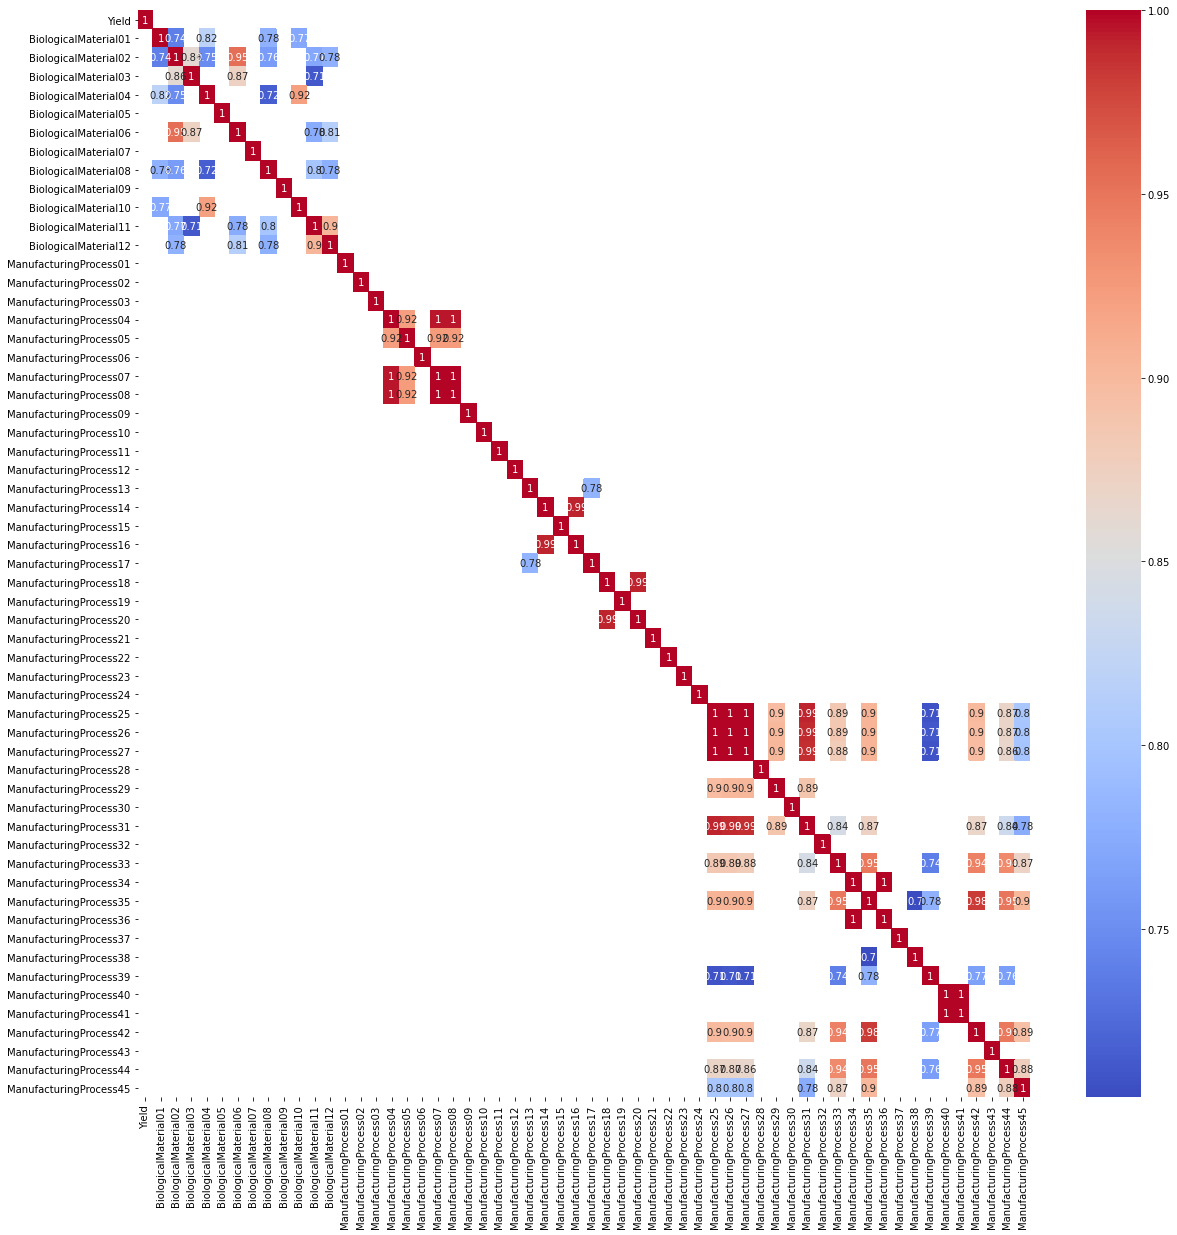

In [22]:
corr = df.corr()
corr = corr[corr>=0.7]
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Selecting x and y as independent and Dependent Features

In [23]:
x = df.drop('Yield', axis=1)
y = df['Yield']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(176, 57)
(176,)


# Splillitng data into train and test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
176*.30

52.8

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(123, 57)
(53, 57)
(123,)
(53,)


In [27]:
print(type(x_train), type(x_test))
print(type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [28]:
x_train.head()

,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,BiologicalMaterial10,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
27,6.86,55.66,63.43,12.53,20.39,48.94,100.0,16.71,11.94,3.07,...,0.021000,0.9,3,7.4,0.0,0.0,11.6,1.3,1.7,2.2
6,7.48,64.47,72.41,13.82,17.71,54.45,100.0,18.72,12.95,3.04,...,0.019000,0.8,2,7.3,0.0,0.0,11.7,0.7,2.0,2.2
40,6.60,58.80,71.17,12.40,22.14,52.24,100.0,17.21,12.77,2.58,...,0.019000,0.0,2,7.2,0.0,0.0,10.9,1.0,1.9,2.2
128,6.23,52.95,66.71,12.75,16.31,45.84,100.0,16.70,12.75,2.98,...,0.019000,0.4,2,7.0,0.0,0.0,11.7,0.5,2.0,2.2
175,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,3.55,...,11.207429,0.9,0,0.0,0.0,0.0,0.0,0.6,0.0,0.0


In [29]:
y_train.head()

27     36.12
6      43.12
40     41.47
128    42.73
175    39.49
Name: Yield, dtype: float64

# Creating a function to generate Regression Metrics

In [257]:
#!pip install threadpoolctl==3.1.0


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [31]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print("MAE:", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2 Score: ", r2)
    
def train_test_scr(model):
    print('Training Score',model.score(x_train, y_train))
    print('Testing Score', model.score(x_test, y_test))

In [260]:
# if your_variable is not None:
#     your_variable.split()


In [261]:
# NoneType.split = split

In [262]:
# import sklearn
# print(sklearn.show_versions())

# KNN Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Applying the KNN Reg Model

In [33]:
m1 = KNeighborsRegressor(n_neighbors=11)
m1.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

Computing Training and Testing R2 Score

In [34]:
train_test_scr(m1)

Training Score 0.34066834501594034
Testing Score 0.4009475916869524


Computing the Model Predictions

In [35]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[39.32272727 39.94090909 39.98181818 39.45181818 39.61636364 41.50272727
 38.58272727 38.99181818 40.34454545 40.64       39.66454545 39.43818182
 39.77727273 41.58818182 39.26818182 40.82545455 39.92545455 40.00272727
 40.26090909 41.30181818 41.22727273 37.97818182 41.74818182 40.76363636
 38.52272727 39.91727273 39.69       40.00909091 40.07818182 39.63454545
 39.85545455 39.76454545 40.60454545 40.76636364 39.78818182 38.03727273
 39.80727273 40.68636364 39.51727273 39.57909091 38.45       40.51545455
 38.87545455 40.22636364 38.90090909 39.70363636 39.21636364 39.89454545
 39.92       39.43       41.32909091 40.56545455 40.95545455]


# Computing Regression Evaluation Metrics

In [37]:
print(type(y_test))
print(type(ypred_m1))
print(type(y_test.shape))
print(ypred_m1.shape)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'tuple'>
(53,)


In [38]:
reg_eval_metrics(y_test, ypred_m1)

MAE: 0.9653344768439107
MSE:  1.5944099953220026
RMSE:  1.2626994873373485
R2 Score:  0.4009475916869524
